![Imagenes](https://cdn.discordapp.com/attachments/836236485509513247/1251199655274872853/image.png?ex=666db5fb&is=666c647b&hm=beeb29692411f2ef0c2a5d1f5906a9798b793d2e254a968f3d1503ea757f8dda&)

# Clasificacion de Imágenes

* Autor: Angel Gallozo
* Legajo:156308
* e-mail: luisangelgallozo@gmail.com

## Informacion Dataset
Este conjunto de datos contiene 6899 imágenes de 8 clases distintas compiladas de diversas fuentes. 
Las clases incluyen:
* avión
* coche 
* gato
* perro 
* flor 
* fruta 
* moto 
* persona.


## Objetivo
* Construir una Arquitectura CNN para la clasificacion de imágenes.

## Exploracion y Análisis de Datos

In [1]:
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2

path = './images/'

In [2]:
clases={}
# Mostrar la cantidad de instancias para cada clase
for folder in  os.listdir(path) : 
    files = glob.glob(pathname= str( path +'//' + folder + '/*.jpg'))
    # print(f'found {len(files)} in folder {folder}')
    clases[folder] = len(files)

Text(0, 0.5, 'Cantidad Imagenes')

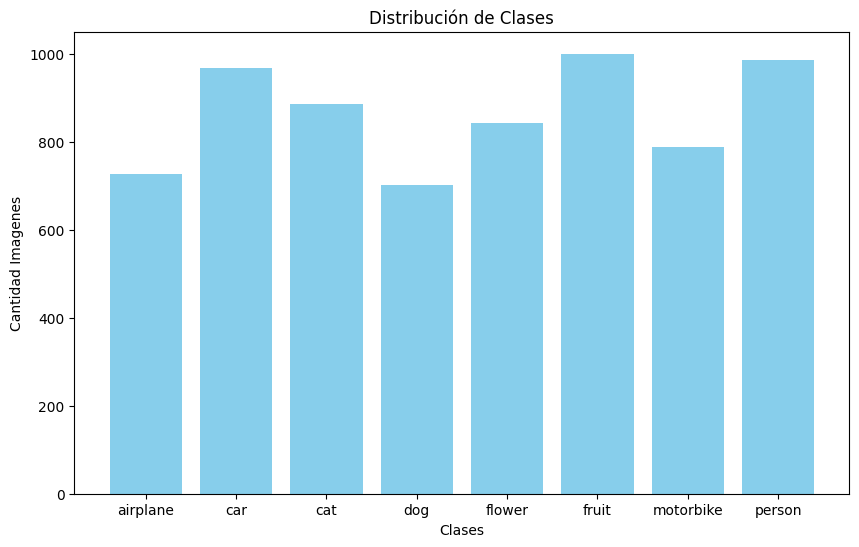

In [3]:
keys = list(clases.keys())
values = list(clases.values())
fig = plt.figure(figsize=(10, 6))
plt.bar(keys, values, color='skyblue')

# Añadir título y etiquetas
plt.title('Distribución de Clases')
plt.xlabel('Clases')
plt.ylabel('Cantidad Imagenes')

Como vemos la distribución de las clases rondan entre los 700 y 1000 observaciones.

In [4]:
# Mostrar dimensiones de las imágenes
sizes = []
for folder in  os.listdir(path) : 
    folder_path = os.path.join(path, folder)
    files = glob.glob(os.path.join(folder_path, '*'))
    for file in files: 
        image = plt.imread(file)
        sizes.append(image.shape)

pd.Series(sizes).value_counts()

(100, 100, 3)    1968
(256, 256, 3)     983
(108, 197, 3)       6
(89, 294, 3)        5
(111, 187, 3)       4
                 ... 
(356, 378, 3)       1
(286, 250, 3)       1
(326, 275, 3)       1
(311, 335, 3)       1
(69, 141, 3)        1
Length: 3602, dtype: int64

In [5]:
# Taggeado de clases a numeros
i, labels = 0, {}
for item in os.listdir(path):
    labels[item] = i
    i += 1
labels

{'airplane': 0,
 'car': 1,
 'cat': 2,
 'dog': 3,
 'flower': 4,
 'fruit': 5,
 'motorbike': 6,
 'person': 7}

In [6]:
# Definiendo dimensiones para toda las imagenes
def define_Xy(path, s):
    X = []
    y = []
    for folder in  os.listdir(path) : 
        files = glob.glob(pathname= str( path +'//' + folder + '/*.jpg'))
        for file in files: 
            image = cv2.imread(file)
            image_array = cv2.resize(image , (s,s))
            X.append(list(image_array))
            y.append(labels[folder])
    return np.array(X), np.array(y)

X, y = define_Xy(path, 50)

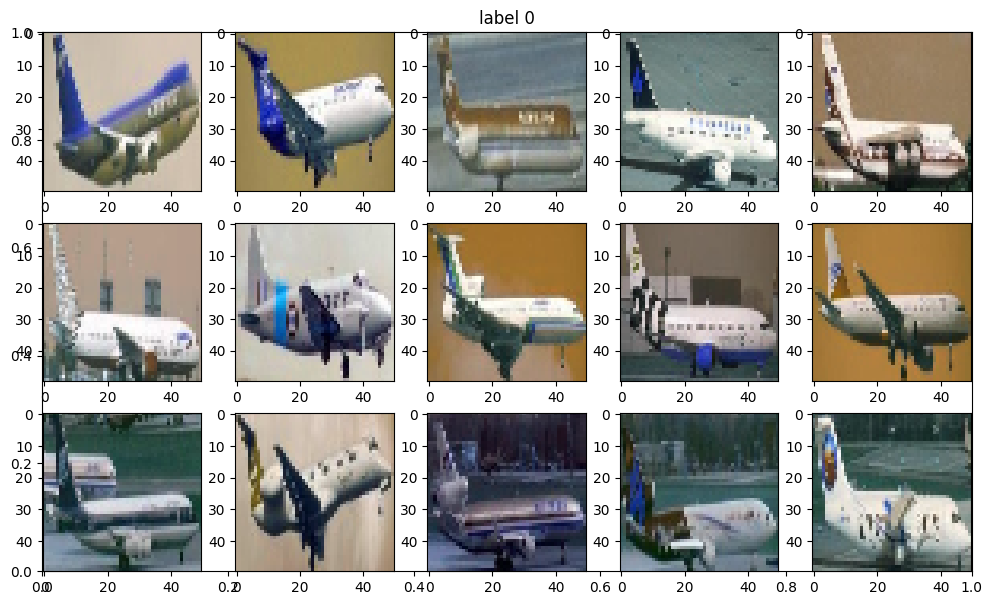

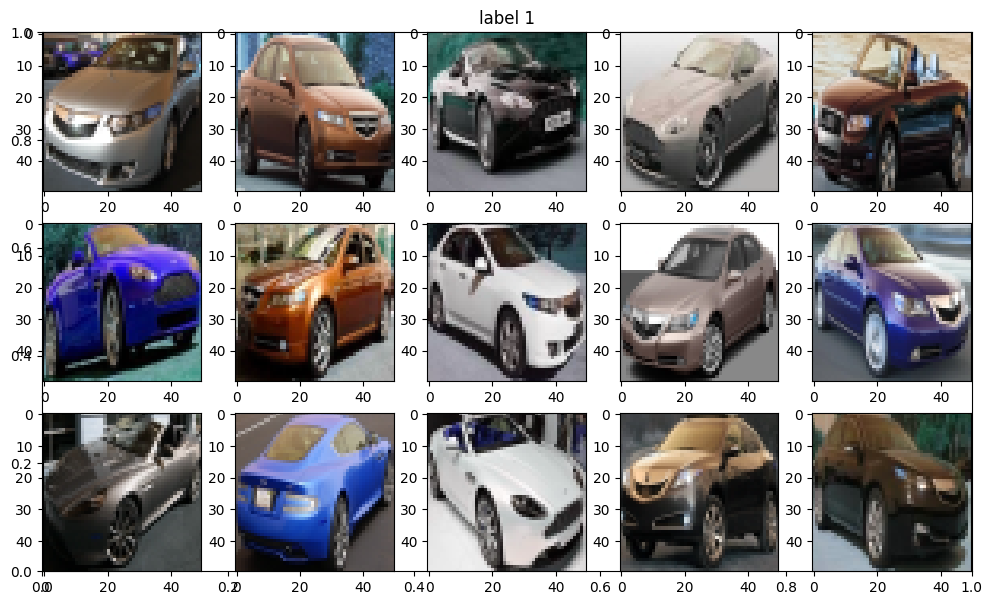

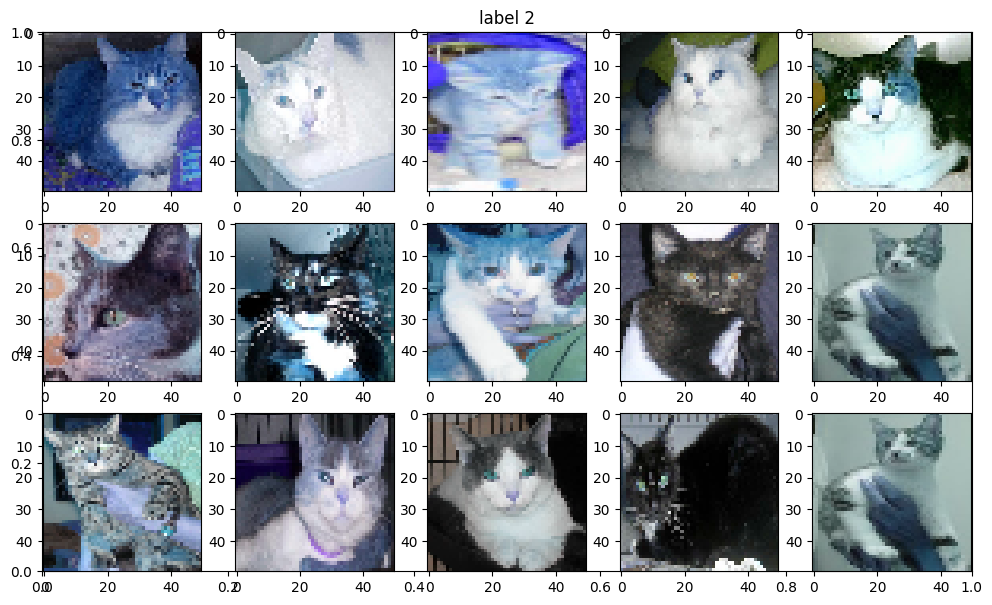

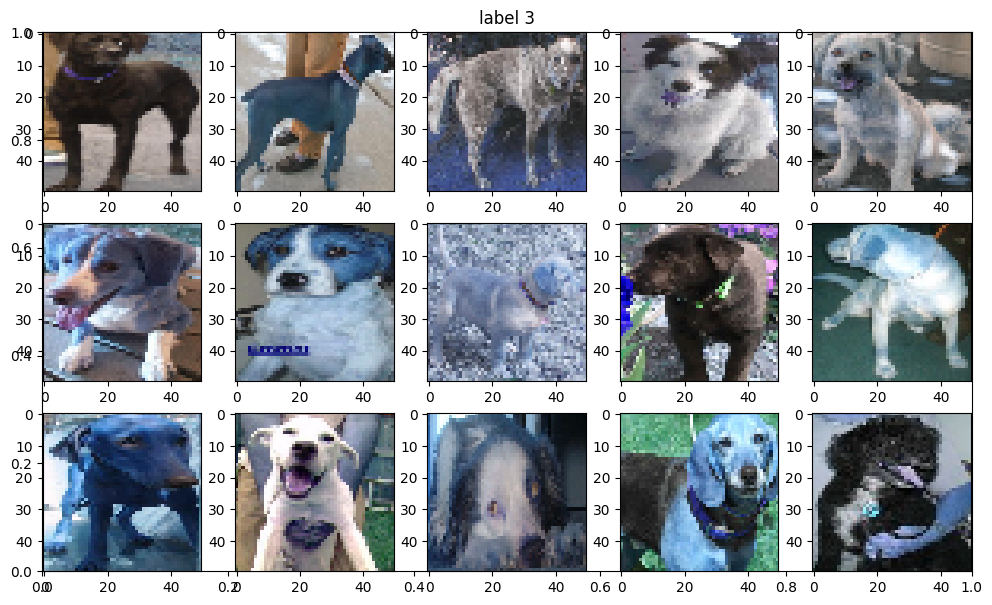

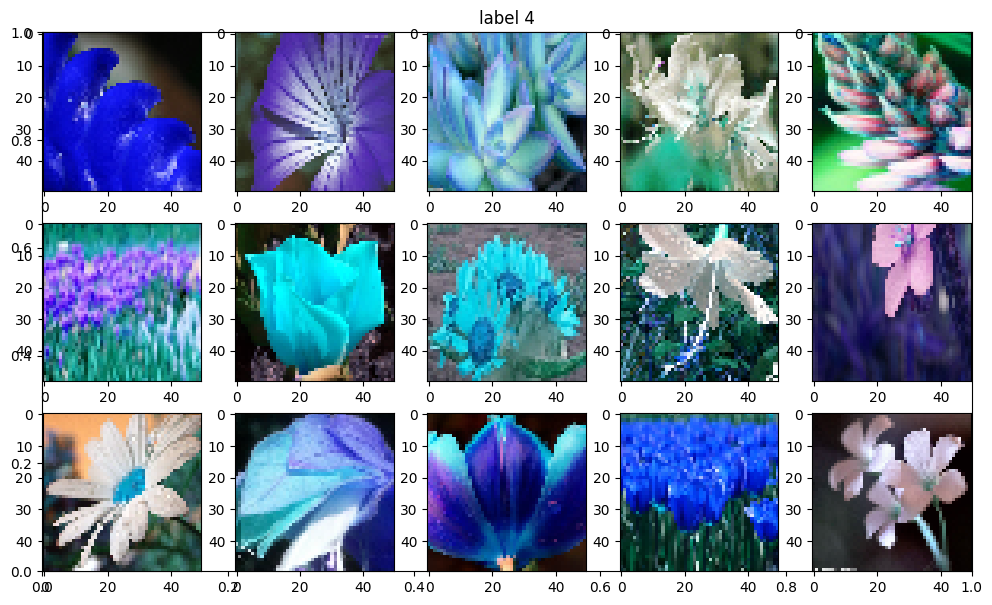

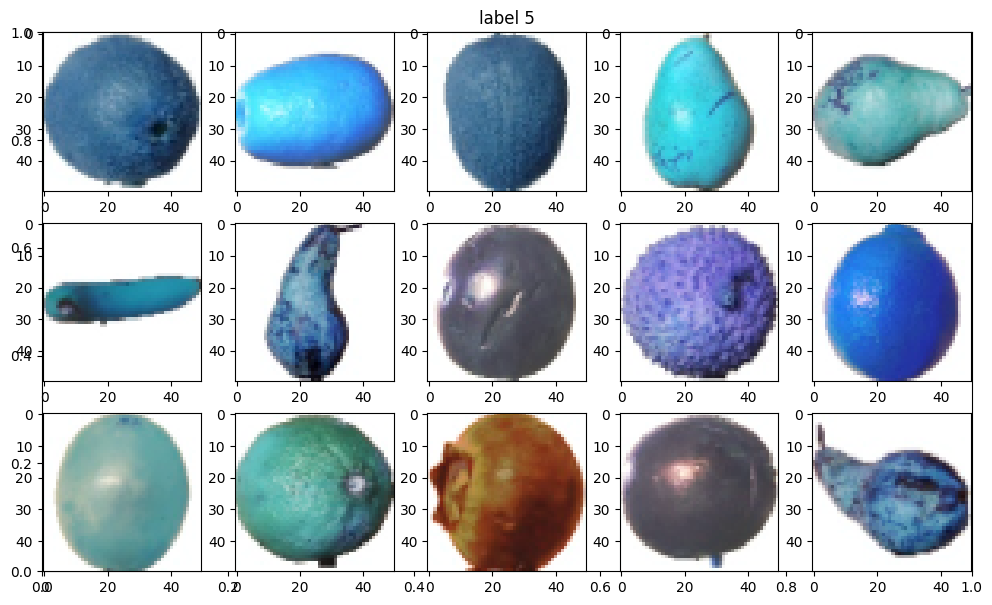

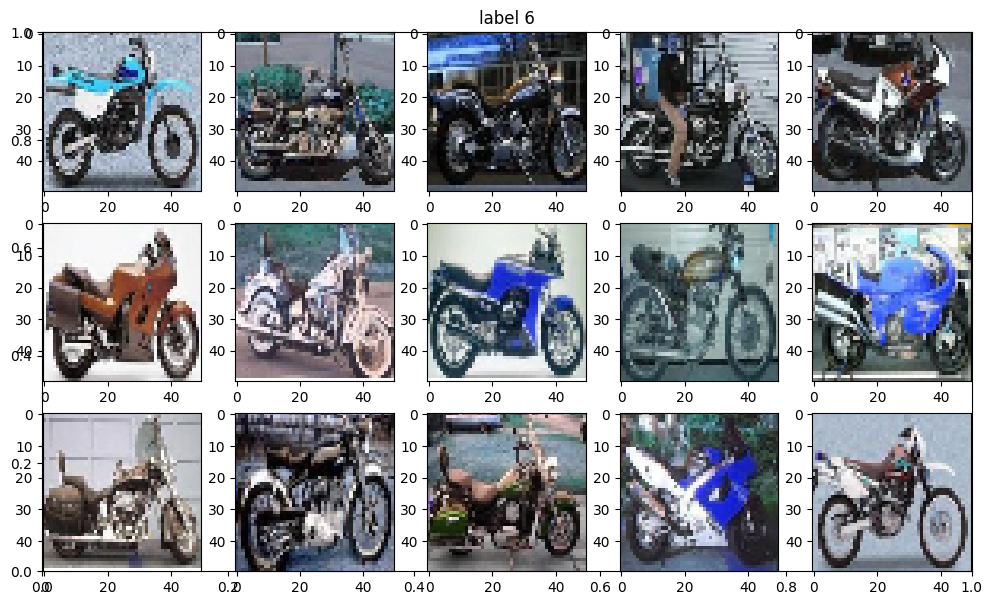

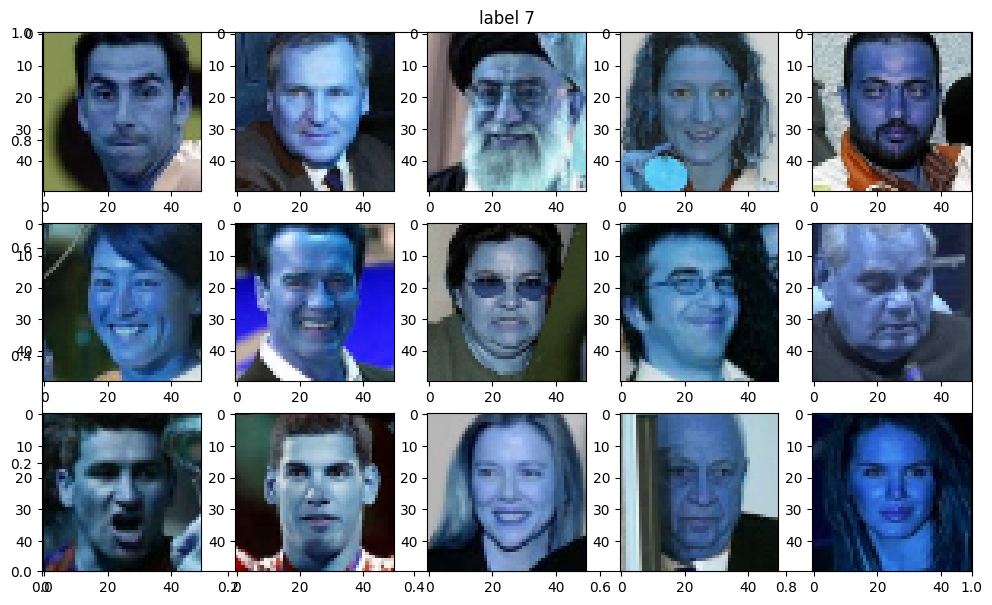

In [7]:
# graficamos las imágenes re-dimensionadas
def PlotImages(data, title):
    fig = plt.figure(figsize=(12, 7)) 
    plt.title('label '+ str(title))
    columns, rows = 5, 3
    for i in range(1, columns * rows + 1):
        img = data[np.random.randint(len(data))] 
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()

for i in range(len(np.unique(y))):
    PlotImages(X[y==i],i)

## Modelado y Experimentación

In [8]:
import keras
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import classification_report

In [9]:
###################################################################################################
## Division de datos para entrenamiento, validacion y testing
###################################################################################################

X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, y, random_state=42, train_size=0.7, shuffle=True)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, random_state=42, test_size=0.5)

In [10]:
# TAMAÑO DE LOS CONJUNTOS DE TRAIN, VALIDATION Y TEST:
print('-----------------------------------------------------------------------')
print('tamaños datasets:')
print('x_train:',X_train.shape)
print('y_train:',y_train.shape)
print('')
print('x_valid:',X_valid.shape)
print('y_valid:',y_valid.shape)
print('')
print('x_test:',X_test.shape)
print('y_test:',y_test.shape)
print('-----------------------------------------------------------------------')

-----------------------------------------------------------------------
tamaños datasets:
x_train: (4829, 50, 50, 3)
y_train: (4829,)

x_valid: (1035, 50, 50, 3)
y_valid: (1035,)

x_test: (1035, 50, 50, 3)
y_test: (1035,)
-----------------------------------------------------------------------


In [11]:
X_train[20]

array([[[ 58,  34,  92],
        [ 37,  13,  76],
        [ 39,  17,  96],
        ...,
        [ 62,  42,  89],
        [ 78,  60, 103],
        [ 79,  67, 101]],

       [[ 53,  40,  78],
        [ 43,  25,  72],
        [ 39,  15,  82],
        ...,
        [ 48,  31,  72],
        [ 72,  57, 103],
        [ 85,  69, 122]],

       [[ 55,  37,  42],
        [ 62,  48,  53],
        [ 33,  12,  59],
        ...,
        [ 61,  41,  88],
        [ 66,  54, 103],
        [ 82,  64, 123]],

       ...,

       [[ 70,  70,  70],
        [ 55,  65,  69],
        [ 43,  35,  45],
        ...,
        [ 93,  85,  81],
        [124, 115, 112],
        [167, 159, 146]],

       [[ 56,  54,  60],
        [ 57,  51,  61],
        [ 62,  59,  50],
        ...,
        [139, 134, 133],
        [117, 112, 110],
        [112, 111,  98]],

       [[ 59,  54,  56],
        [ 19,  13,  14],
        [ 29,  27,  26],
        ...,
        [133, 131, 121],
        [121, 116, 115],
        [ 99,  94,  91]]

In [12]:
input_shape = X.shape[1:]
nClasses = len(np.unique(y))

### Modelo 1 

Se toma como punto de partida la siguiente configuracion:

In [13]:
model_1 = keras.models.Sequential([
        # Extraer características locales de las imágenes mediante la aplicación de filtros.
        # Detectar bordes, texturas y patrones simples en las primeras capas y características más complejas en las capas profundas.
        keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),

        # Reducir la dimensionalidad de las características y la carga computacional.
        # Hacer la representación más manejable y evitar el sobreajuste.
        keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # Acelerar el entrenamiento.
        # Mejorar la estabilidad y rendimiento del modelo.
        keras.layers.BatchNormalization(),
        # Capa intermedia con 64 neuronas
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.BatchNormalization(),

        # Capas Completamente Conectadas
        # Combinar las características extraídas para hacer la clasificación final. Unidimensionamos los tamaños de las anteriores capas.
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        
        # Reducir el sobreajuste.
        # Apagar aleatoriamente neuronas durante el entrenamiento para evitar que el modelo se sobreajuste a los datos de entrenamiento.
        keras.layers.Dropout(0.5),

        keras.layers.Dense(nClasses, activation='softmax'),
])

In [14]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                        

Se utlizará un optimizador para minimizar la función de costo "sparse_Categorical_entropy" (util en la clasifiacacion de variables categóricas). Para las métricas utilizaremos el accuracy

Epoch 1/50
151/151 [==============================] - 8s 47ms/step - loss: 1.2005 - accuracy: 0.7440 - val_loss: 0.8212 - val_accuracy: 0.8222
Epoch 2/50
151/151 [==============================] - 7s 47ms/step - loss: 0.3998 - accuracy: 0.8882 - val_loss: 1.0678 - val_accuracy: 0.7961
Epoch 3/50
151/151 [==============================] - 7s 47ms/step - loss: 0.2395 - accuracy: 0.9279 - val_loss: 0.3831 - val_accuracy: 0.8802
Epoch 4/50
151/151 [==============================] - 7s 48ms/step - loss: 0.1750 - accuracy: 0.9424 - val_loss: 0.4884 - val_accuracy: 0.8879
Epoch 5/50
151/151 [==============================] - 7s 46ms/step - loss: 0.1275 - accuracy: 0.9578 - val_loss: 0.8539 - val_accuracy: 0.8444
Epoch 6/50
151/151 [==============================] - 7s 46ms/step - loss: 0.1021 - accuracy: 0.9652 - val_loss: 0.4701 - val_accuracy: 0.8918
Epoch 7/50
151/151 [==============================] - 7s 46ms/step - loss: 0.0886 - accuracy: 0.9720 - val_loss: 0.9023 - val_accuracy: 0.7990

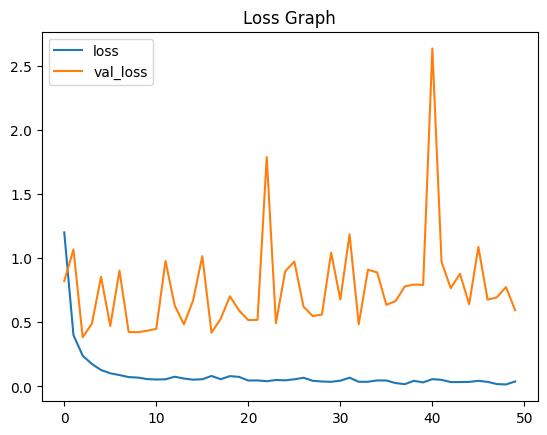

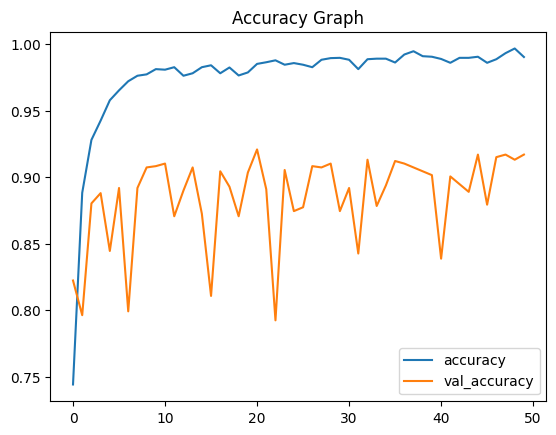

In [15]:
# Compilación del modelo
# sparse_categorical_crossentropy: Se usa cuando las etiquetas están en formato entero(por ejemplo, 0, 1, 2, ..., n_clases-1) en lugar de one-hot encoded.
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# shuffle = True (Mezclar los datos antes de cada época)
# El entrenamiento se hace de a lotes de 32
history_64 = model_1.fit(X_train, y_train, validation_data=(X_valid,y_valid),epochs=50, batch_size=32,shuffle=True) # Shuffle: Mezclar los datos de entrenamiento antes de cada época

history_df_64 = pd.DataFrame(history_64.history)
history_df_64.loc[:, ['loss', 'val_loss']].plot(title="Loss Graph")
history_df_64.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy Graph")
plt.show()

Los gráficos sugieren que el modelo podría estar sufriendo de sobreajuste (overfitting). Esto ocurre cuando el modelo se ajusta demasiado bien a los datos de entrenamiento, pero no generaliza bien a los datos de validación. Se procede a probar con un número de neuronas menor (32) y luego uno mayor (128).

In [16]:
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO] Evaluando red neuronal...")
predictions = model_1.predict(X_test, batch_size=128)
print(classification_report(y_test,predictions.argmax(axis=1)))

[INFO] Evaluando red neuronal...
9/9 [==============================] - 0s 34ms/step
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       129
           1       0.98      0.97      0.97       136
           2       0.78      0.87      0.82       142
           3       0.78      0.71      0.74       112
           4       0.89      0.88      0.89       120
           5       0.99      1.00      0.99       140
           6       1.00      0.99      0.99        98
           7       0.99      1.00      1.00       158

    accuracy                           0.92      1035
   macro avg       0.92      0.92      0.92      1035
weighted avg       0.93      0.92      0.92      1035




Si bien se tiene una exactitud (accuracy) del 92% se evaluará la exactitud y la divergencia entre los versiones con 32 y 128 neuronas para quedarnos con la version que brinde mejores resultados. A grandes rasgos la mayoria de clases suelen tener valores altos de precision y sensibilidad(recall), salvo las clases 2-cat y 3-dog siendo las más bajas.

#### Modelo 1 Con 32 neuronas en Capa Intermedia

In [17]:
model_1_32 = keras.models.Sequential([
        # Extraer características locales de las imágenes mediante la aplicación de filtros.
        # Detectar bordes, texturas y patrones simples en las primeras capas y características más complejas en las capas profundas.
        keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),

        # Reducir la dimensionalidad de las características y la carga computacional.
        # Hacer la representación más manejable y evitar el sobreajuste.
        keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # Acelerar el entrenamiento.
        # Mejorar la estabilidad y rendimiento del modelo.
        keras.layers.BatchNormalization(),
        
        # Reduccion de neuronas a 32
        keras.layers.Conv2D(32, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.BatchNormalization(),

        # Capas Completamente Conectadas
        # Combinar las características extraídas para hacer la clasificación final. Unidimensionamos los tamaños de las anteriores capas.
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        
        # Reducir el sobreajuste.
        # Apagar aleatoriamente neuronas durante el entrenamiento para evitar que el modelo se sobreajuste a los datos de entrenamiento.
        keras.layers.Dropout(0.5),

        keras.layers.Dense(nClasses, activation='softmax'),
])

Epoch 1/50
151/151 [==============================] - 6s 39ms/step - loss: 1.0467 - accuracy: 0.7287 - val_loss: 0.9909 - val_accuracy: 0.8000
Epoch 2/50
151/151 [==============================] - 6s 38ms/step - loss: 0.3749 - accuracy: 0.8772 - val_loss: 0.4000 - val_accuracy: 0.8792
Epoch 3/50
151/151 [==============================] - 6s 38ms/step - loss: 0.2413 - accuracy: 0.9151 - val_loss: 0.3287 - val_accuracy: 0.8850
Epoch 4/50
151/151 [==============================] - 6s 38ms/step - loss: 0.1433 - accuracy: 0.9486 - val_loss: 0.3610 - val_accuracy: 0.8995
Epoch 5/50
151/151 [==============================] - 6s 38ms/step - loss: 0.1236 - accuracy: 0.9561 - val_loss: 0.3718 - val_accuracy: 0.8879
Epoch 6/50
151/151 [==============================] - 6s 38ms/step - loss: 0.0974 - accuracy: 0.9667 - val_loss: 0.3100 - val_accuracy: 0.9159
Epoch 7/50
151/151 [==============================] - 6s 38ms/step - loss: 0.0952 - accuracy: 0.9648 - val_loss: 0.3044 - val_accuracy: 0.9169

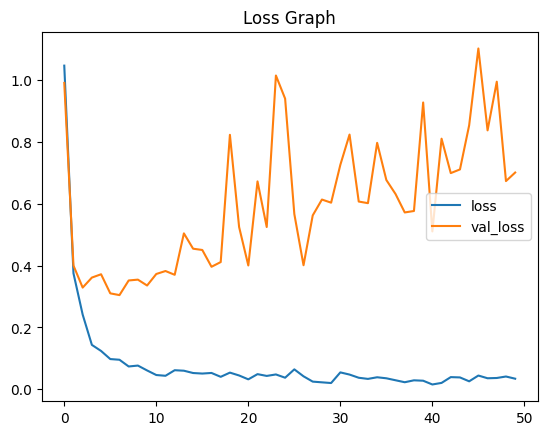

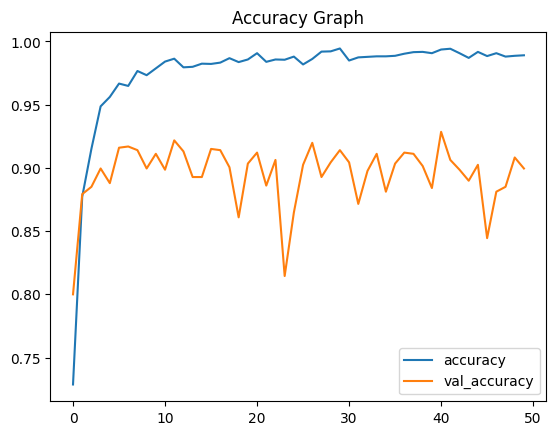

In [18]:
# Compilación del modelo
# sparse_categorical_crossentropy: Se usa cuando las etiquetas están en formato entero(por ejemplo, 0, 1, 2, ..., n_clases-1) en lugar de one-hot encoded.
model_1_32.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# shuffle = True (Mezclar los datos antes de cada época)
# El entrenamiento se hace de a lotes de 32
history_32 = model_1_32.fit(X_train, y_train, validation_data=(X_valid,y_valid),epochs=50, batch_size=32,shuffle=True) # Shuffle: Mezclar los datos de entrenamiento antes de cada época

history_df_32 = pd.DataFrame(history_32.history)
history_df_32.loc[:, ['loss', 'val_loss']].plot(title="Loss Graph")
history_df_32.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy Graph")
plt.show()

Se denota una gran lejania entre los resultados de perdida y exactitud (accuracy), si bien en el entrenamiento se tienen buenos resultados, en la etapa de validación el modelo performa por debajo indicando que sigue el overfitting que vimos al inicio.

In [19]:
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO] Evaluando red neuronal...")
predictions = model_1_32.predict(X_test, batch_size=128)
print(classification_report(y_test,predictions.argmax(axis=1)))

[INFO] Evaluando red neuronal...
9/9 [==============================] - 0s 30ms/step
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       129
           1       0.92      0.99      0.96       136
           2       0.85      0.68      0.75       142
           3       0.76      0.56      0.65       112
           4       0.72      0.97      0.83       120
           5       0.97      1.00      0.99       140
           6       1.00      0.99      0.99        98
           7       0.99      1.00      1.00       158

    accuracy                           0.90      1035
   macro avg       0.89      0.89      0.89      1035
weighted avg       0.90      0.90      0.89      1035



Presenta una leve disminución en la exactitud(accuracy) pasando del 92%(64 neuronas) al 90%. Las métricas son mínimamente menores en la mayoria de clases comparado al modelo anterior.

#### Modelo 1 con 128 Neuronas

In [20]:
model_1_128 = keras.models.Sequential([
        # Extraer características locales de las imágenes mediante la aplicación de filtros.
        # Detectar bordes, texturas y patrones simples en las primeras capas y características más complejas en las capas profundas.
        keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),

        # Reducir la dimensionalidad de las características y la carga computacional.
        # Hacer la representación más manejable y evitar el sobreajuste.
        keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # Acelerar el entrenamiento.
        # Mejorar la estabilidad y rendimiento del modelo.
        keras.layers.BatchNormalization(),
        # Aumento de neuronas a 128
        keras.layers.Conv2D(128, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.BatchNormalization(),

        # Capas Completamente Conectadas
        # Combinar las características extraídas para hacer la clasificación final. Unidimensionamos los tamaños de las anteriores capas.
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        
        # Reducir el sobreajuste.
        # Apagar aleatoriamente neuronas durante el entrenamiento para evitar que el modelo se sobreajuste a los datos de entrenamiento.
        keras.layers.Dropout(0.5),

        keras.layers.Dense(nClasses, activation='softmax'),
])

Epoch 1/50
151/151 [==============================] - 11s 69ms/step - loss: 1.5958 - accuracy: 0.7635 - val_loss: 1.2913 - val_accuracy: 0.8029
Epoch 2/50
151/151 [==============================] - 10s 68ms/step - loss: 0.6041 - accuracy: 0.8768 - val_loss: 1.2593 - val_accuracy: 0.8126
Epoch 3/50
151/151 [==============================] - 10s 65ms/step - loss: 0.2871 - accuracy: 0.9203 - val_loss: 0.6536 - val_accuracy: 0.8763
Epoch 4/50
151/151 [==============================] - 10s 64ms/step - loss: 0.2202 - accuracy: 0.9404 - val_loss: 0.5031 - val_accuracy: 0.9150
Epoch 5/50
151/151 [==============================] - 10s 64ms/step - loss: 0.1584 - accuracy: 0.9517 - val_loss: 0.6050 - val_accuracy: 0.8928
Epoch 6/50
151/151 [==============================] - 10s 65ms/step - loss: 0.1429 - accuracy: 0.9551 - val_loss: 0.6259 - val_accuracy: 0.8792
Epoch 7/50
151/151 [==============================] - 10s 65ms/step - loss: 0.1593 - accuracy: 0.9555 - val_loss: 0.8107 - val_accuracy:

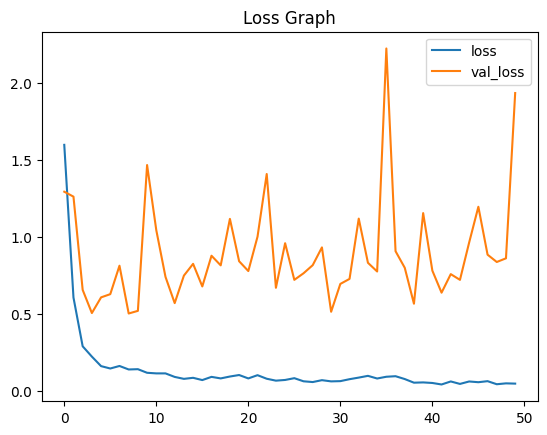

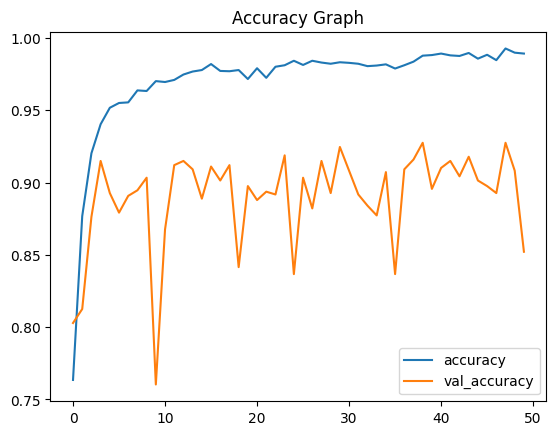

In [21]:
# Compilación del modelo
# sparse_categorical_crossentropy: Se usa cuando las etiquetas están en formato entero(por ejemplo, 0, 1, 2, ..., n_clases-1) en lugar de one-hot encoded.
model_1_128.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# shuffle = True (Mezclar los datos antes de cada época)
# El entrenamiento se hace de a lotes de 32
history_128 = model_1_128.fit(X_train, y_train, validation_data=(X_valid,y_valid),epochs=50, batch_size=32,shuffle=True) # Shuffle: Mezclar los datos de entrenamiento antes de cada época

history_df_128 = pd.DataFrame(history_128.history)
history_df_128.loc[:, ['loss', 'val_loss']].plot(title="Loss Graph")
history_df_128.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy Graph")
plt.show()

El overfitting se mantiene y además existen muchas más variaciones (picos) que en las versiones anteriores.

In [22]:
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO] Evaluando red neuronal...")
predictions = model_1_128.predict(X_test, batch_size=128)
print(classification_report(y_test,predictions.argmax(axis=1)))

[INFO] Evaluando red neuronal...
9/9 [==============================] - 1s 49ms/step
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       129
           1       0.99      0.96      0.97       136
           2       0.85      0.65      0.74       142
           3       0.87      0.30      0.45       112
           4       0.52      0.98      0.68       120
           5       0.96      1.00      0.98       140
           6       0.98      1.00      0.99        98
           7       0.99      0.99      0.99       158

    accuracy                           0.86      1035
   macro avg       0.89      0.85      0.84      1035
weighted avg       0.90      0.86      0.85      1035



La exactitud (accuracy) baja aún más llegando al 86%, mucho menor a los modelos de 32 y 64. Sobre las métricas casi similares, aunque aun peores en sensibilidad(recall) para las calses 2-cat y 3-dog.

### Comparación de las 3 versiones: 32,64,128 Neuronas.

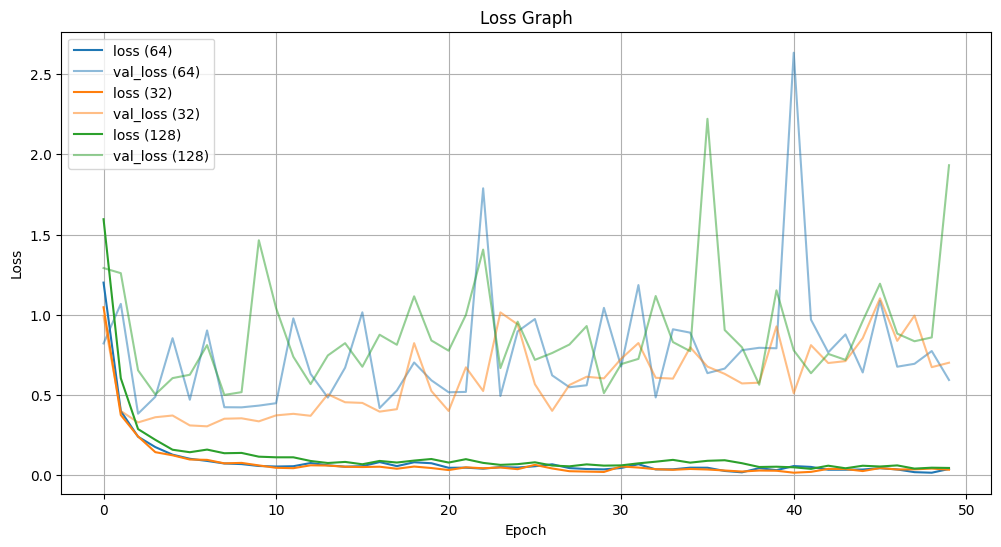

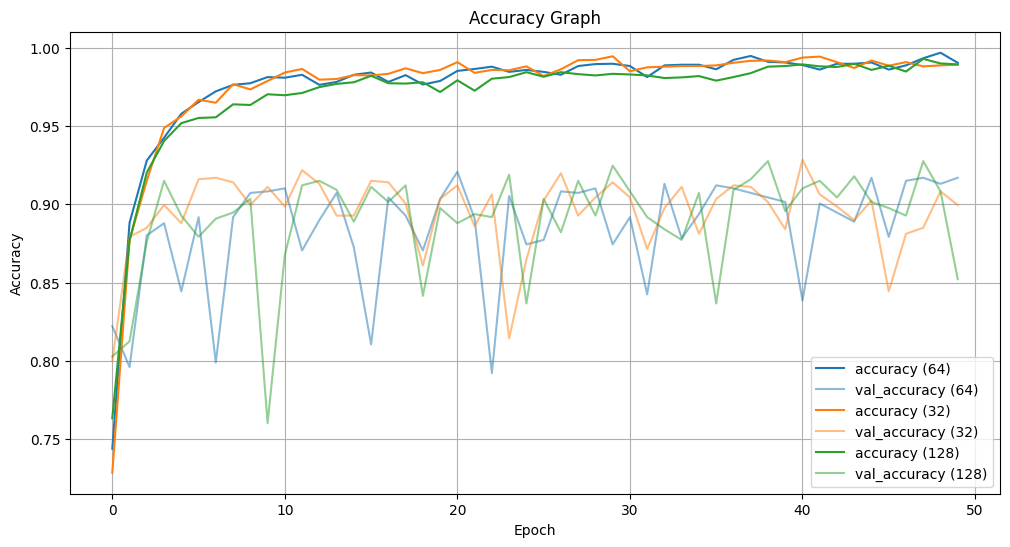

In [24]:
# Definición de colores base
color_64 = 'tab:blue'
color_32 = 'tab:orange'
color_128 = 'tab:green'

# Función para obtener un color con transparencia
def get_color_with_alpha(color, alpha):
    return plt.matplotlib.colors.to_rgba(color, alpha)

# Figura para las pérdidas
plt.figure(figsize=(12, 6))

# Plot para 64 neuronas
plt.plot(history_df_64['loss'], label='loss (64)', linestyle='-', color=color_64)
plt.plot(history_df_64['val_loss'], label='val_loss (64)', linestyle='-', color=get_color_with_alpha(color_64, 0.5))

# Plot para 32 neuronas
plt.plot(history_df_32['loss'], label='loss (32)', linestyle='-', color=color_32)
plt.plot(history_df_32['val_loss'], label='val_loss (32)', linestyle='-', color=get_color_with_alpha(color_32, 0.5))

# Plot para 128 neuronas
plt.plot(history_df_128['loss'], label='loss (128)', linestyle='-', color=color_128)
plt.plot(history_df_128['val_loss'], label='val_loss (128)', linestyle='-', color=get_color_with_alpha(color_128, 0.5))

plt.title("Loss Graph")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# Mostrar la figura de pérdidas
plt.show()

# Figura para la precisión
plt.figure(figsize=(12, 6))

# Plot para 64 neuronas
plt.plot(history_df_64['accuracy'], label='accuracy (64)', linestyle='-', color=color_64)
plt.plot(history_df_64['val_accuracy'], label='val_accuracy (64)', linestyle='-', color=get_color_with_alpha(color_64, 0.5))

# Plot para 32 neuronas
plt.plot(history_df_32['accuracy'], label='accuracy (32)', linestyle='-', color=color_32)
plt.plot(history_df_32['val_accuracy'], label='val_accuracy (32)', linestyle='-', color=get_color_with_alpha(color_32, 0.5))

# Plot para 128 neuronas
plt.plot(history_df_128['accuracy'], label='accuracy (128)', linestyle='-', color=color_128)
plt.plot(history_df_128['val_accuracy'], label='val_accuracy (128)', linestyle='-', color=get_color_with_alpha(color_128, 0.5))

plt.title("Accuracy Graph")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Mostrar la figura de precisión
plt.show()


Comparando los resultados de las 3 versiones, si bien las 3 tienen overfitting vemos que la más estable tanto en la pérdida como en el accuracy es el modelo con una capa media de 32 neuronas. Sin embargo, la version de 32 neuronas tuvo una exactitud(accuracy) levemente menor menor(90%) al de 64(92%), sumado a eso se decidió seguir mejorando la version de 64 neuronas porque era un número aceptable para no tener problemas con el poder de generalización del modelo.

### Modelo 1.Version 2

Cambios en la arquitectura:
* Aumentar la Regularización: 
    * Añadir más capas de dropout.
    * Añadir regularización L2 en las capas densas y/o convolucionales.
* Data Augmentation:
    * Aumentar los datos de entrenamiento generando nuevas muestras a partir de las existentes puede ayudar a mejorar la generalización del modelo. Keras ofrece una clase ImageDataGenerator que facilita esto.

In [25]:
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator

In [26]:
model_2 = keras.models.Sequential([
        keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.001)),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),  # Se agrega Dropout

        keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3), # Se agrega Dropout

        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(nClasses, activation='softmax'),
])

In [27]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 11, 11, 64)      

Epoch 1/50
151/151 [==============================] - 10s 62ms/step - loss: 1.3683 - accuracy: 0.7184 - val_loss: 2.1758 - val_accuracy: 0.5382
Epoch 2/50
151/151 [==============================] - 10s 66ms/step - loss: 1.3040 - accuracy: 0.7430 - val_loss: 1.6902 - val_accuracy: 0.6599
Epoch 3/50
151/151 [==============================] - 9s 61ms/step - loss: 1.2683 - accuracy: 0.7561 - val_loss: 3.0190 - val_accuracy: 0.4618
Epoch 4/50
151/151 [==============================] - 9s 61ms/step - loss: 1.2817 - accuracy: 0.7604 - val_loss: 1.7019 - val_accuracy: 0.6831
Epoch 5/50
151/151 [==============================] - 9s 61ms/step - loss: 1.2300 - accuracy: 0.7714 - val_loss: 1.5086 - val_accuracy: 0.7130
Epoch 6/50
151/151 [==============================] - 10s 64ms/step - loss: 1.1641 - accuracy: 0.7877 - val_loss: 1.2233 - val_accuracy: 0.8077
Epoch 7/50
151/151 [==============================] - 10s 66ms/step - loss: 1.1704 - accuracy: 0.7911 - val_loss: 3.3332 - val_accuracy: 0.

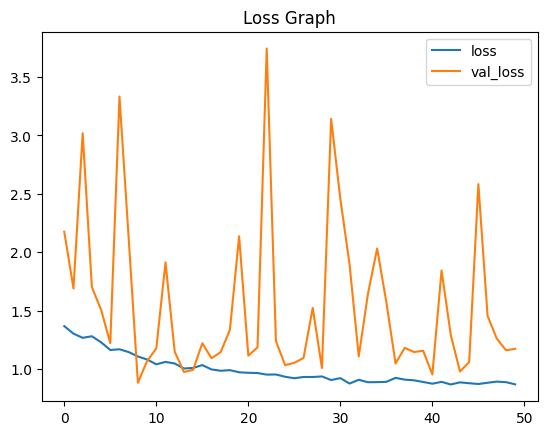

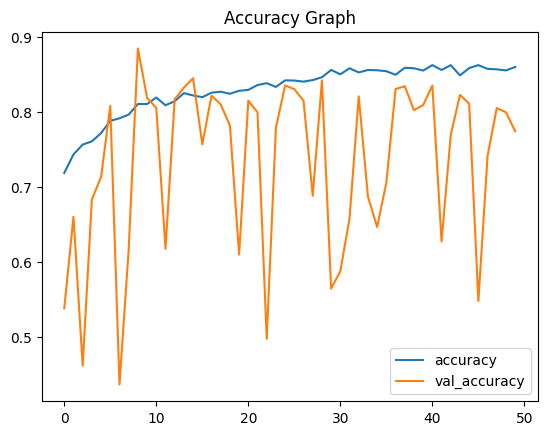

In [29]:
# Compilación del modelo
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20, # Reducir rotacion
    width_shift_range=0.2, # Reducir dezplazamiento horizontal
    height_shift_range=0.2, # Reducir dezplazamiento vertical
    shear_range=0.2, # Reducir corte
    zoom_range=0.2, # Reducir Zoom
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

# Entrenamiento del modelo
history_1_v2 = model_2.fit(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_valid, y_valid), epochs=50)

history_df_1_v2 = pd.DataFrame(history_1_v2.history)
history_df_1_v2.loc[:, ['loss', 'val_loss']].plot(title="Loss Graph")
history_df_1_v2.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy Graph")
plt.show()

Los picos en los gráficos de loss y accuracy de validación pueden deberse a varias razones, incluyendo sobreajuste, un aprendizaje excesivamente agresivo o variabilidad en el conjunto de validación.

In [30]:
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO] Evaluando red neuronal...")
predictions = model_2.predict(X_test, batch_size=128)
print(classification_report(y_test,predictions.argmax(axis=1)))

[INFO] Evaluando red neuronal...
9/9 [==============================] - 0s 46ms/step
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       129
           1       1.00      0.85      0.92       136
           2       0.86      0.35      0.50       142
           3       0.52      0.53      0.52       112
           4       0.58      0.96      0.72       120
           5       1.00      0.99      1.00       140
           6       0.65      0.89      0.75        98
           7       1.00      0.93      0.96       158

    accuracy                           0.80      1035
   macro avg       0.81      0.80      0.78      1035
weighted avg       0.83      0.80      0.79      1035



La exactitud(accuracy) se ve muy afectada bajando un 12%, además las clases 3-dog, 4-flower y 6-motorbike se vieron perjudicadas en precision, en sensibilidad(recall) la clase 2-cat fue la más afectada bajando hasta un 35%. Se decide realizar más ajustes en las capas del modelo.

### Modelo 1.Version 3

Para la siguiente modificacion se optó por:
1. Ajustar la tasa de aprendizaje
    * Reducir la tasa de aprendizaje puede ayudar a estabilizar el entrenamiento, con un valor más bajo para el optimizador Adam.
2. Aumentar el Dropout
    * Incrementar la cantidad de dropout puede ayudar a reducir el sobreajuste. De 0.3 a 0.4
3. Ajustar el Data Augmentation
    * Para asegurar que no se esté introduciendo demasiada variabilidad. Reducimos a 10 la rotaciones, y reducimos a 0.1 el desplazamienot horizontal y vertical, tambien el corte y zoom
4. Añadir más capas de regularización
    * Agregar más capas de BatchNormalization y/o Dropout en diferentes puntos de la red
5. Cambiar el Batch Size
    * El tamaño del lote (batch_size) puede tener un impacto significativo en la estabilidad del entrenamiento. Se cambia el batch_size de 32 a 64

In [31]:
model_3 = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),

    keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(nClasses, activation='softmax'),
])

In [32]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 batch_normalization_8 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_9 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 32)        0         
                                                      

Epoch 1/50
76/76 [==============================] - 10s 124ms/step - loss: 2.7562 - accuracy: 0.3245 - val_loss: 2.8307 - val_accuracy: 0.3855
Epoch 2/50
76/76 [==============================] - 9s 122ms/step - loss: 2.1562 - accuracy: 0.4703 - val_loss: 1.3842 - val_accuracy: 0.6425
Epoch 3/50
76/76 [==============================] - 9s 120ms/step - loss: 1.8353 - accuracy: 0.5442 - val_loss: 1.1378 - val_accuracy: 0.7053
Epoch 4/50
76/76 [==============================] - 9s 120ms/step - loss: 1.7038 - accuracy: 0.5798 - val_loss: 1.0989 - val_accuracy: 0.7227
Epoch 5/50
76/76 [==============================] - 10s 125ms/step - loss: 1.5538 - accuracy: 0.6134 - val_loss: 1.0621 - val_accuracy: 0.7391
Epoch 6/50
76/76 [==============================] - 9s 123ms/step - loss: 1.4610 - accuracy: 0.6430 - val_loss: 1.0427 - val_accuracy: 0.7614
Epoch 7/50
76/76 [==============================] - 9s 123ms/step - loss: 1.3398 - accuracy: 0.6680 - val_loss: 1.0000 - val_accuracy: 0.7729
Epoc

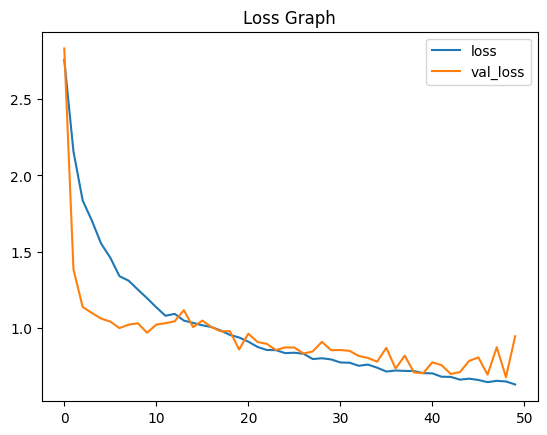

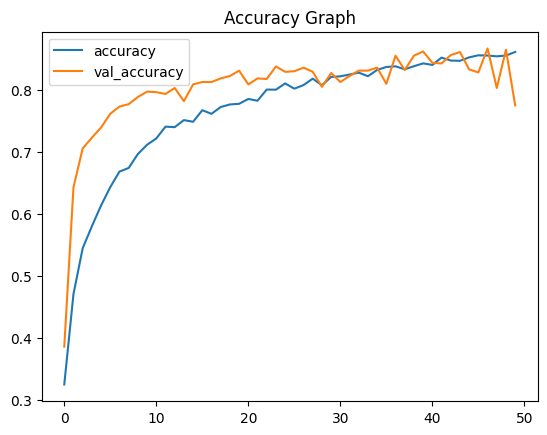

In [33]:
model_3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

history_1_v3 = model_3.fit(datagen.flow(X_train, y_train, batch_size=64), validation_data=(X_valid, y_valid), epochs=50)
history_df_1_v3 = pd.DataFrame(history_1_v3.history)
history_df_1_v3.loc[:, ['loss', 'val_loss']].plot(title="Loss Graph")
history_df_1_v3.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy Graph")
plt.show()

Con esta gráfica vemos que la funcion de minimizacion de costos se reducen y convergen, tambien el accuracy de ambas etapas converge de manera prometedora.

In [34]:
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO] Evaluando red neuronal...")
predictions = model_3.predict(X_test, batch_size=128)
print(classification_report(y_test,predictions.argmax(axis=1)))

[INFO] Evaluando red neuronal...
9/9 [==============================] - 1s 47ms/step
              precision    recall  f1-score   support

           0       0.99      0.85      0.92       129
           1       1.00      0.74      0.85       136
           2       0.73      0.58      0.64       142
           3       0.45      0.60      0.52       112
           4       0.69      0.95      0.80       120
           5       1.00      0.95      0.97       140
           6       0.67      0.99      0.80        98
           7       1.00      0.76      0.86       158

    accuracy                           0.80      1035
   macro avg       0.82      0.80      0.79      1035
weighted avg       0.83      0.80      0.80      1035



Con la siguiente matriz de confusión y métricas se obtuvo lo siguiente:
* La exactitud(accuracy) es del 80% (Es decir que el 80% fue clasificado correctamente).
* La sensibilidad(recall) de las clases 1-car, 2-cat, 3-dog y 7-person son los que tienen valores entre 58% y 76%, siendo los más bajos. Todos los demás tiene un 85% en adelante de recall.
* La precision de las clases 2-cat, 3-dog, 4-flower y 6-motorbike son los que menos precision tienen estando entre el 45 y 73%. Siendo el 3-dog con el peor porcentaje con 45% (lo que quiere decir que tiene una tasa significativa de falsos positivos para esa clase).

En resumen, el modelo muestra resultados aceptables (salvo algunas clases ) para la clasificación de la mayoría de imágenes, además de que el overfitting fue reducido en gran medida debido a los ajustes realizados( por ejemplo, regularización, data augmentation, etc.). Se ralizará la construcción de otro modelo para comparar resultados.


### Modelo 2

Para este caso, se plantea un nuevo modelo con 2 capas intermedias de 128 y luego una de 256:
1. Batch Normalization: Normaliza las activaciones para acelerar y estabilizar el entrenamiento.

2. Convolutional Layers (Conv2D): Extraer características de diferentes niveles de complejidad de las imágenes, desde características de bajo nivel (como bordes y texturas) hasta características de alto nivel (como formas y patrones).

3. Activation Function (ReLU): Introducir no linealidad, permitiendo que la red aprenda relaciones más complejas.

4. Pooling Layers (MaxPooling2D): Reducir las dimensiones espaciales de las características, disminuyendo la carga computacional y ayudando a prevenir el sobreajuste al conservar las características más importantes.

5. Dropout Layers: Apagar aleatoriamente un porcentaje de neuronas durante el entrenamiento para prevenir el sobreajuste y mejorar la generalización del modelo.

6. Flatten Layer: Convertir las características 2D en un vector 1D, preparando los datos para las capas densas.

7. Dense (Fully Connected) Layers: Aprender combinaciones complejas de características y realizan la clasificación final.

8. Output Layer with Softmax Activation: Producir una distribución de probabilidad sobre las clases para la clasificación multiclase.

In [35]:
model_4 = keras.Sequential([
    keras.layers.BatchNormalization(input_shape=input_shape),

    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.3),

    keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.3),

    keras.layers.Flatten(),

    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(nClasses, activation='softmax'),
])

In [36]:
model_4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_12 (Bat  (None, 50, 50, 3)        12        
 chNormalization)                                                
                                                                 
 conv2d_10 (Conv2D)          (None, 48, 48, 64)        1792      
                                                                 
 batch_normalization_13 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 24, 24, 64)        0         
                                                      

Se mantiene el optimizador y el learninig_rate, la funcion de optimizacion y accuracy como métrica.

Epoch 1/50
76/76 [==============================] - 25s 323ms/step - loss: 2.6118 - accuracy: 0.2903 - val_loss: 2.0007 - val_accuracy: 0.3246
Epoch 2/50
76/76 [==============================] - 24s 318ms/step - loss: 1.5932 - accuracy: 0.4519 - val_loss: 3.5046 - val_accuracy: 0.2242
Epoch 3/50
76/76 [==============================] - 25s 326ms/step - loss: 1.3282 - accuracy: 0.5231 - val_loss: 3.9838 - val_accuracy: 0.2638
Epoch 4/50
76/76 [==============================] - 25s 324ms/step - loss: 1.1725 - accuracy: 0.5815 - val_loss: 3.6602 - val_accuracy: 0.2908
Epoch 5/50
76/76 [==============================] - 26s 342ms/step - loss: 1.0428 - accuracy: 0.6306 - val_loss: 2.3356 - val_accuracy: 0.4841
Epoch 6/50
76/76 [==============================] - 25s 326ms/step - loss: 0.9543 - accuracy: 0.6567 - val_loss: 1.4388 - val_accuracy: 0.6406
Epoch 7/50
76/76 [==============================] - 25s 329ms/step - loss: 0.9105 - accuracy: 0.6794 - val_loss: 0.9583 - val_accuracy: 0.7256

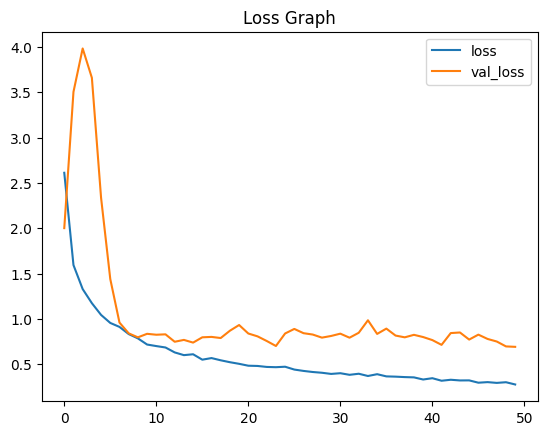

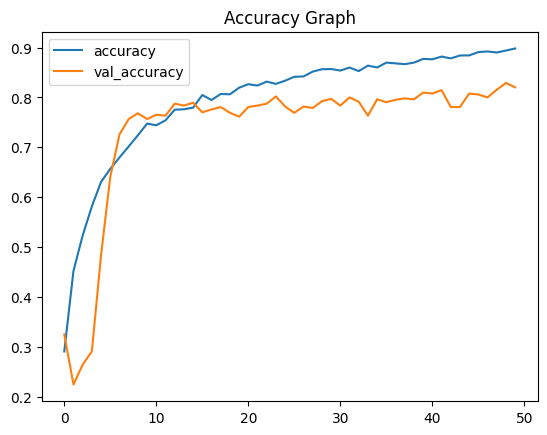

In [37]:
model_4.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

history_2 = model_4.fit(datagen.flow(X_train, y_train, batch_size=64), validation_data=(X_valid, y_valid), epochs=50)
history_df_2 = pd.DataFrame(history_2.history)
history_df_2.loc[:, ['loss', 'val_loss']].plot(title="Loss Graph")
history_df_2.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy Graph")
plt.show()

Según los gráficos que tiende a converger la funcion de perdida y la de accuracy, aún así no termina siendo mejor que el del modelo final anterior.

##### Comparacion Modelo_1_V3 y Modelo_2

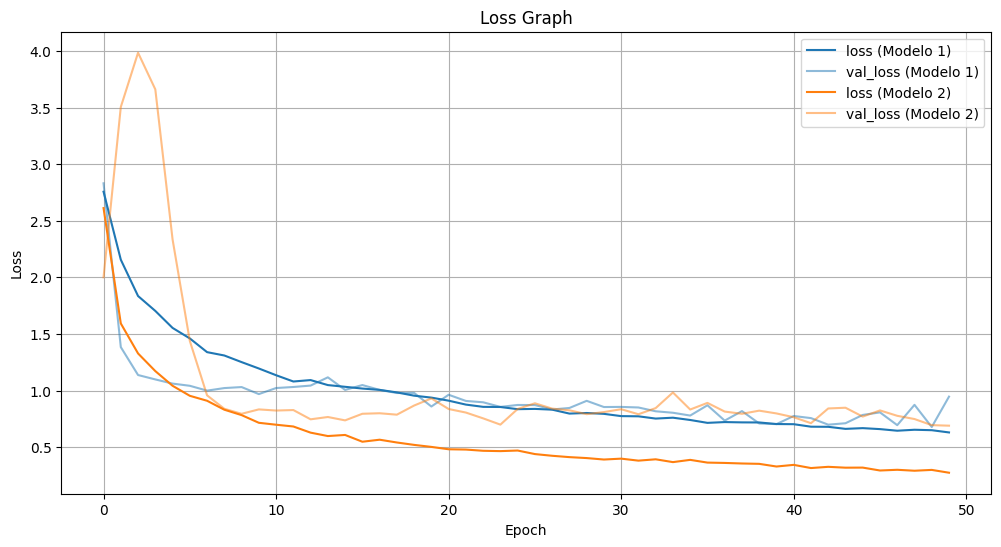

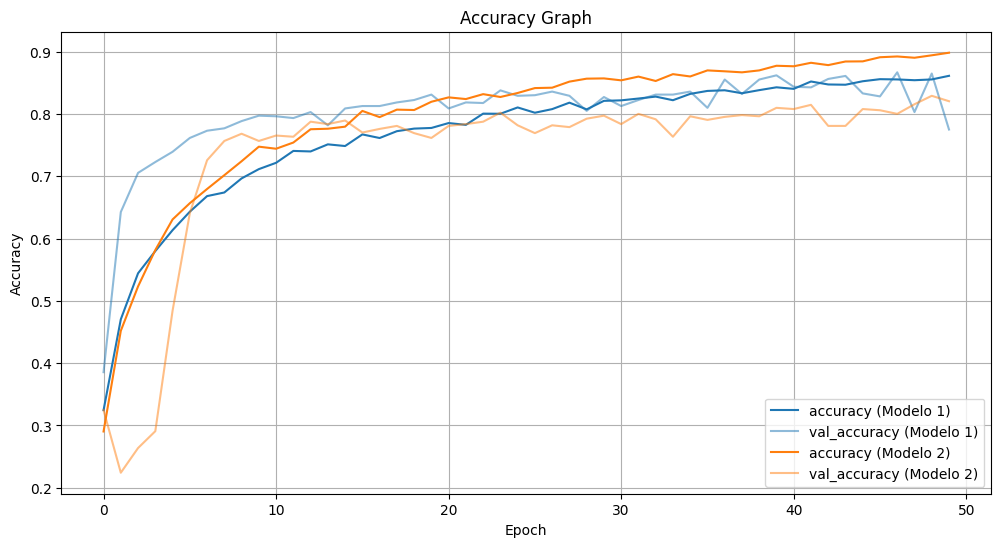

In [42]:
# Definición de colores base
color_model_1 = 'tab:blue'
color_model_2 = 'tab:orange'

# Función para obtener un color con transparencia
def get_color_with_alpha(color, alpha):
    return plt.matplotlib.colors.to_rgba(color, alpha)

# Figura para las pérdidas
plt.figure(figsize=(12, 6))

# Plot para modelo 1
plt.plot(history_df_1_v3['loss'], label='loss (Modelo 1)', linestyle='-', color=color_model_1)
plt.plot(history_df_1_v3['val_loss'], label='val_loss (Modelo 1)', linestyle='-', color=get_color_with_alpha(color_model_1, 0.5))

# Plot para modelo 2
plt.plot(history_df_2['loss'], label='loss (Modelo 2)', linestyle='-', color=color_model_2)
plt.plot(history_df_2['val_loss'], label='val_loss (Modelo 2)', linestyle='-', color=get_color_with_alpha(color_model_2, 0.5))


plt.title("Loss Graph")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# Mostrar la figura de pérdidas
plt.show()

# Figura para la precisión
plt.figure(figsize=(12, 6))

# Plot para modelo 1
plt.plot(history_df_1_v3['accuracy'], label='accuracy (Modelo 1)', linestyle='-', color=color_model_1)
plt.plot(history_df_1_v3['val_accuracy'], label='val_accuracy (Modelo 1)', linestyle='-', color=get_color_with_alpha(color_model_1, 0.5))

# Plot para modelo 2
plt.plot(history_df_2['accuracy'], label='accuracy (Modelo 2)', linestyle='-', color=color_model_2)
plt.plot(history_df_2['val_accuracy'], label='val_accuracy (Modelo 2)', linestyle='-', color=get_color_with_alpha(color_model_2, 0.5))


plt.title("Accuracy Graph")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Mostrar la figura de precisión
plt.show()

Al comparar vemos que efectivamente el modelo anterior sigue siendo mejor en convergencia en las etapas de entrenamiento y validacion.

In [43]:
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO] Evaluando red neuronal...")
predictions = model_4.predict(X_test, batch_size=128)
print(classification_report(y_test,predictions.argmax(axis=1)))

[INFO] Evaluando red neuronal...
9/9 [==============================] - 1s 134ms/step
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       129
           1       1.00      0.74      0.85       136
           2       0.55      0.97      0.70       142
           3       0.79      0.24      0.37       112
           4       0.85      0.93      0.88       120
           5       1.00      0.99      0.99       140
           6       0.81      0.97      0.88        98
           7       1.00      0.94      0.97       158

    accuracy                           0.84      1035
   macro avg       0.87      0.83      0.82      1035
weighted avg       0.88      0.84      0.83      1035



La exactitud(accuracy) dió 84% mucho mejor que el 80% del modelo final anterior. Existe en algunas clases leves variaciones de mejoras tanto en recall como en precision, el caso que más destaca es el de la clase 3-dog, cuya precision subio de 45% a 79% pero en sensibilidad(recall) bajo de 60% a 24 lo cual sugiere que existen dificultades para detectar las instancias de esa clase de manera correcta. Se realizará un último ajuste en el modelo.

### Modelo 2.Version 2

El modelo cuenta con los siguientes ajustes:
1. Regularizador L2 (kernel_regularizer=regularizers.l2(0.01)) en las capas Conv2D y Dense: Añadir regularización L2 para reducir el riesgo de sobreajuste penalizando grandes pesos en las capas.

2. Incremento en Dropout (de 0.3 a 0.4 en las capas Conv2D, y de 0.5 a 0.6 en las capas Dense): Se busca incrementar el valor de Dropout para una regularización más agresiva, reduciendo aún más el riesgo de sobreajuste.

3. Añadir Callbacks de Early Stopping y Reduce LR on Plateau: EarlyStopping detiene el entrenamiento si no hay mejora en la pérdida de validación durante varias épocas, y ReduceLROnPlateau reduce la tasa de aprendizaje si la pérdida de validación no mejora, ayudando a un mejor ajuste del modelo.

In [44]:
from tensorflow.keras import callbacks

In [45]:
model_5 = keras.Sequential([
    keras.layers.BatchNormalization(input_shape=input_shape),

    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.4),

    keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.4),

    keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.4),

    keras.layers.Flatten(),

    keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.Dropout(0.6),

    keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    keras.layers.Dropout(0.6),

    keras.layers.Dense(nClasses, activation='softmax'),
])

In [46]:
model_5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_16 (Bat  (None, 50, 50, 3)        12        
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 48, 48, 64)        1792      
                                                                 
 batch_normalization_17 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 24, 24, 64)        0         
                                                      

Epoch 1/50
76/76 [==============================] - 27s 339ms/step - loss: 20.4012 - accuracy: 0.1876 - val_loss: 18.5451 - val_accuracy: 0.3314 - lr: 1.0000e-04
Epoch 2/50
76/76 [==============================] - 26s 344ms/step - loss: 18.4836 - accuracy: 0.2825 - val_loss: 19.0454 - val_accuracy: 0.2415 - lr: 1.0000e-04
Epoch 3/50
76/76 [==============================] - 26s 339ms/step - loss: 17.7979 - accuracy: 0.3303 - val_loss: 19.6616 - val_accuracy: 0.2348 - lr: 1.0000e-04
Epoch 4/50
76/76 [==============================] - 25s 324ms/step - loss: 17.1771 - accuracy: 0.3951 - val_loss: 19.0023 - val_accuracy: 0.2966 - lr: 1.0000e-04
Epoch 5/50
76/76 [==============================] - 25s 323ms/step - loss: 16.5104 - accuracy: 0.4585 - val_loss: 17.5782 - val_accuracy: 0.4058 - lr: 1.0000e-04
Epoch 6/50
76/76 [==============================] - 25s 323ms/step - loss: 15.8909 - accuracy: 0.5057 - val_loss: 16.3795 - val_accuracy: 0.5024 - lr: 1.0000e-04
Epoch 7/50
76/76 [==========

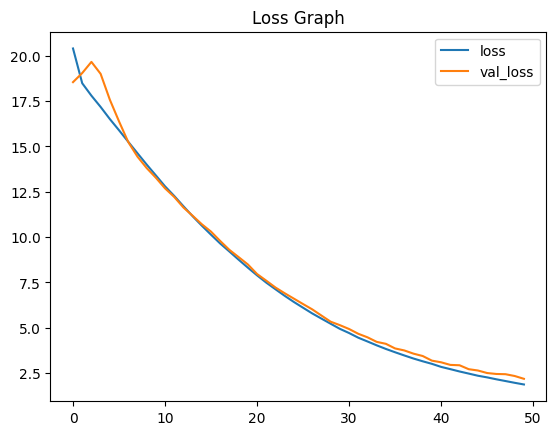

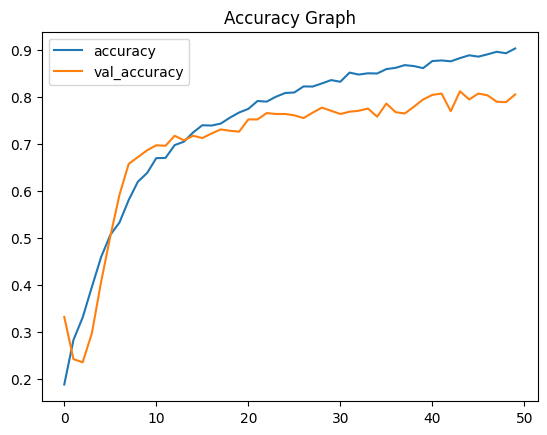

In [47]:
model_5.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)
# patience: Especifica el número de épocas adicionales que se entrenará el modelo después de que la métrica monitoreada haya dejado de mejorar. 
# restore_best_weights: Si se establece en True, restaurará los pesos del modelo al punto en que se obtuvo la mejor métrica monitoreada
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Factor: Especifica el factor de reducción de la tasa de aprendizaje
# min_lr: La tasa de aprendizaje mínima a la que se puede reducir.
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history_2_v2 = model_5.fit(datagen.flow(X_train, y_train, batch_size=64), validation_data=(X_valid, y_valid), epochs=50, callbacks=[early_stopping, reduce_lr])

history_df_2_v2 = pd.DataFrame(history_2_v2.history)
history_df_2_v2.loc[:, ['loss', 'val_loss']].plot(title="Loss Graph")
history_df_2_v2.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy Graph")
plt.show()

Buena convergencia en la funcion de pérdida y tambien una más cercania entre los accuracys. Se nota la gran mejoría sobre el overfitting, en las etapas de entrenamiento y validación.

##### Comparacion Modelo_1_V3 y Modelo_2_V2

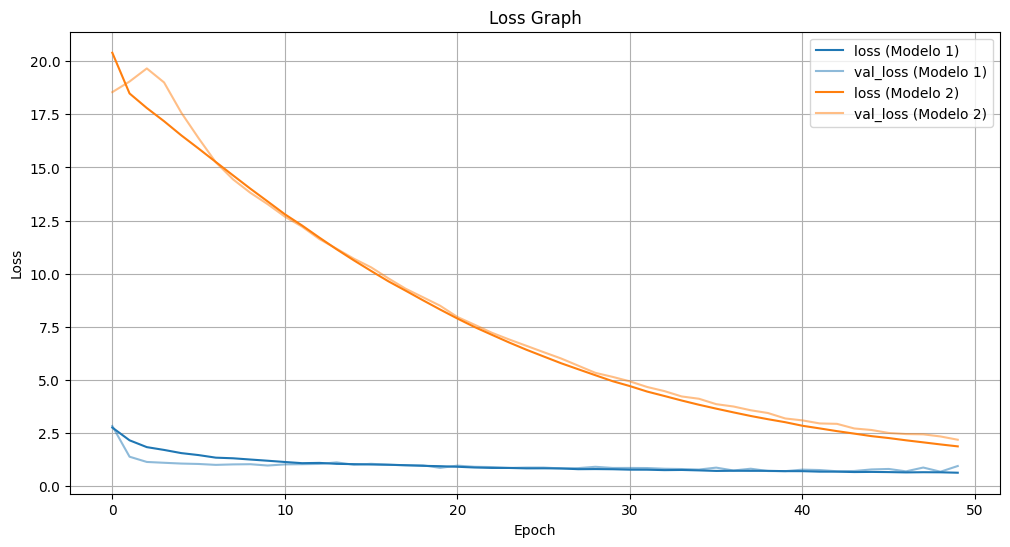

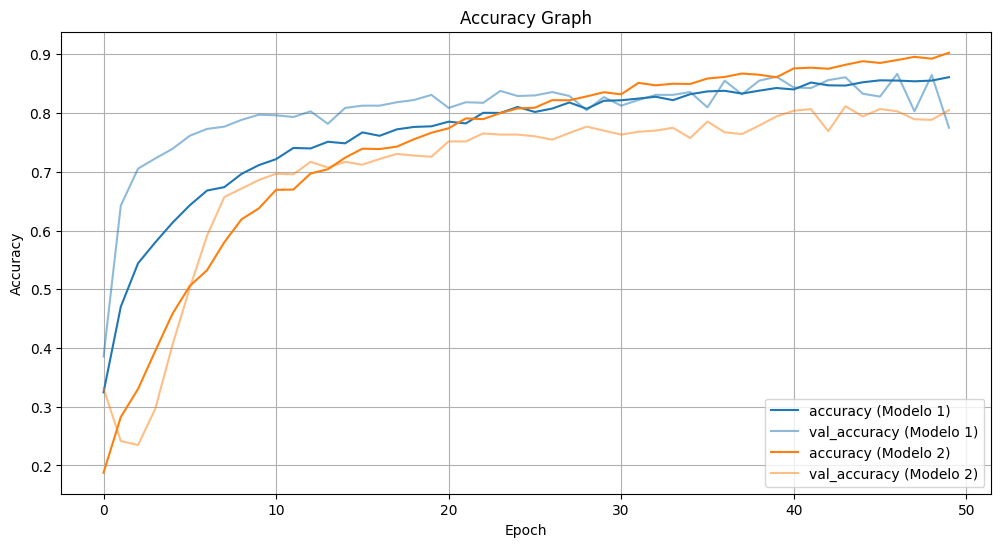

In [49]:
# Definición de colores base
color_model_1 = 'tab:blue'
color_model_2 = 'tab:orange'

# Función para obtener un color con transparencia
def get_color_with_alpha(color, alpha):
    return plt.matplotlib.colors.to_rgba(color, alpha)

# Figura para las pérdidas
plt.figure(figsize=(12, 6))

# Plot para modelo 1
plt.plot(history_df_1_v3['loss'], label='loss (Modelo 1)', linestyle='-', color=color_model_1)
plt.plot(history_df_1_v3['val_loss'], label='val_loss (Modelo 1)', linestyle='-', color=get_color_with_alpha(color_model_1, 0.5))

# Plot para modelo 2
plt.plot(history_df_2_v2['loss'], label='loss (Modelo 2)', linestyle='-', color=color_model_2)
plt.plot(history_df_2_v2['val_loss'], label='val_loss (Modelo 2)', linestyle='-', color=get_color_with_alpha(color_model_2, 0.5))


plt.title("Loss Graph")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# Mostrar la figura de pérdidas
plt.show()

# Figura para la precisión
plt.figure(figsize=(12, 6))

# Plot para modelo 1
plt.plot(history_df_1_v3['accuracy'], label='accuracy (Modelo 1)', linestyle='-', color=color_model_1)
plt.plot(history_df_1_v3['val_accuracy'], label='val_accuracy (Modelo 1)', linestyle='-', color=get_color_with_alpha(color_model_1, 0.5))

# Plot para modelo 2
plt.plot(history_df_2_v2['accuracy'], label='accuracy (Modelo 2)', linestyle='-', color=color_model_2)
plt.plot(history_df_2_v2['val_accuracy'], label='val_accuracy (Modelo 2)', linestyle='-', color=get_color_with_alpha(color_model_2, 0.5))


plt.title("Accuracy Graph")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Mostrar la figura de precisión
plt.show()

Vemos que en la funcion de pérdida de ambos modelos existe convergencia en ambos, aunque la del modelo_1_V3 tiene valores más chicos. En los resultados de accuracy tenemos que el modelo_1_V3 tiene mayor convergencia.

In [48]:
# Evaluando el modelo de predicción con las imágenes de test
print("[INFO] Evaluando red neuronal...")
predictions = model_5.predict(X_test, batch_size=128)
print(classification_report(y_test,predictions.argmax(axis=1)))

[INFO] Evaluando red neuronal...
9/9 [==============================] - 1s 131ms/step
              precision    recall  f1-score   support

           0       0.99      0.74      0.85       129
           1       1.00      0.83      0.91       136
           2       0.53      0.98      0.69       142
           3       0.94      0.13      0.23       112
           4       0.89      0.92      0.90       120
           5       1.00      0.94      0.97       140
           6       0.72      1.00      0.83        98
           7       0.99      0.99      0.99       158

    accuracy                           0.83      1035
   macro avg       0.88      0.82      0.80      1035
weighted avg       0.89      0.83      0.81      1035



Con la siguiente matriz de confusión y métricas se obtuvo lo siguiente:
* La exactitud(accuracy) es del 83% (Es decir que el 83% fue clasificado correctamente).
* La sensibilidad(recall) de las clases varia entre 74%-99%, destacando una baja importante en la clase 3-dog teniendo un 13%, indicando dificultades para identificar correctamente las instancias de esa clase. 
* La precision de las clases en su mayoria rondan el 70-99% siendo el peor porcentaje con 53% de la clase 2-cat (lo que quiere decir que tiene una tasa significativa de falsos positivos para esa clase).

Como decisión final si bien se llega a una exactitud mejor en el modelo_2_V2, sigue siendo el modelo_1_V3 mucho mejor para la clasificación, ya que solo es levemente menor en accuracy. Además en las etapas de entrenamiento y validacion, mostró una buena convergencia tanto en perdidas como en exactitud.

## Predicciones Modelo 1 Final

In [50]:
# Invertir el diccionario para obtener nombres de clase a partir de números
inverse_labels = {v: k for k, v in labels.items()}

def get_class_name(class_index):
    return inverse_labels[class_index]

In [51]:
# Seleccionar un subconjunto de datos de prueba
X_test_subset = X_test[:1000]
y_test_subset = y_test[:1000]

# Obtener las predicciones del modelo
probas = model_3.predict(X_test_subset)
test_pred = np.argmax(probas, axis=1)

# Filtrar las imágenes mal clasificadas
misclassified_indices = np.where(y_test_subset != test_pred)[0]
misclassified_images = X_test_subset[misclassified_indices][:25]
misclassified_labels = test_pred[misclassified_indices][:25]
correct_labels = y_test_subset[misclassified_indices][:25]


32/32 [==============================] - 1s 15ms/step


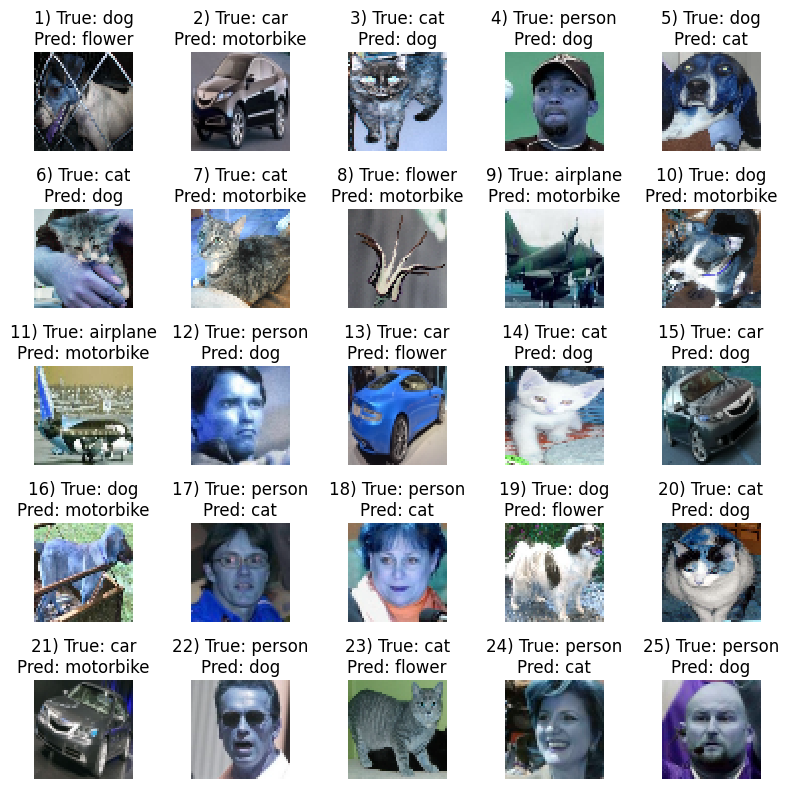

In [52]:
# Visualizar las imágenes mal clasificadas
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True, figsize=(8, 8))
ax = ax.flatten()
for i in range(25):
    img = misclassified_images[i]
    if img.shape[-1] == 3:  # Si las imágenes son RGB
        ax[i].imshow(img, interpolation='nearest')
    else:  # Si las imágenes son en escala de grises
        ax[i].imshow(img.squeeze(), cmap='Greys', interpolation='nearest')
    
    true_class_name = get_class_name(correct_labels[i])
    pred_class_name = get_class_name(misclassified_labels[i])
    
    ax[i].set_title(f'{i+1}) True: {true_class_name}\nPred: {pred_class_name}')
    ax[i].axis('off')

plt.tight_layout()
plt.show()

En las predicciones erróneas, tenemos más visible lo que nos decian las métricas evaluadas en el modelo_1_V3, donde teniamos que existian dificultados en identificar bien la clase car, cat, dog y person ya que tenian un recall entre el 58% y 76%. Además de los falsos positivos que podrian ocurrir en la clase dog debido a una precision de 45% para esta clase.

## Modelo MLP con Keras

Como sabemos los MLP (Perceptrón Multicapa), utilizan capas densas y se suele aplanar la entrada antes de pasarla por estas capas. Para este experimento utilizaremos uno para la clasificacion de las imágenes.

In [56]:
from tensorflow.keras.optimizers import Adam

In [54]:
# Aplanado de imágenes(Normalizacion)
X_train_flat = X_train.reshape((X_train.shape[0], -1)).astype('float32') / 255.0
X_valid_flat = X_valid.reshape((X_valid.shape[0], -1)).astype('float32') / 255.0

Las entradas deben ser vectores unidimensionales. Esto significa que, para procesar imágenes bidimensionales, necesitamos convertir cada imagen 2D en un vector 1D. Este proceso se llama "aplanado". Las capas densas esperan entradas de forma (n_features,). Para imágenes, esto significa que cada píxel debe ser una característica.

In [57]:
model_mlp = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_flat.shape[1],), kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.4),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.4),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.4),
    Dense(nClasses, activation='softmax')  
])

# Compilar el modelo
model_mlp.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Epoch 1/50
76/76 [==============================] - 3s 37ms/step - loss: 3.6222 - accuracy: 0.1682 - val_loss: 3.3520 - val_accuracy: 0.2879
Epoch 2/50
76/76 [==============================] - 3s 35ms/step - loss: 3.3441 - accuracy: 0.2450 - val_loss: 3.1639 - val_accuracy: 0.3295
Epoch 3/50
76/76 [==============================] - 3s 34ms/step - loss: 3.1784 - accuracy: 0.2891 - val_loss: 3.0179 - val_accuracy: 0.4309
Epoch 4/50
76/76 [==============================] - 3s 35ms/step - loss: 3.0372 - accuracy: 0.3322 - val_loss: 2.8402 - val_accuracy: 0.5053
Epoch 5/50
76/76 [==============================] - 3s 35ms/step - loss: 2.9085 - accuracy: 0.3690 - val_loss: 2.7083 - val_accuracy: 0.5208
Epoch 6/50
76/76 [==============================] - 3s 35ms/step - loss: 2.7532 - accuracy: 0.4088 - val_loss: 2.5469 - val_accuracy: 0.5343
Epoch 7/50
76/76 [==============================] - 3s 36ms/step - loss: 2.6187 - accuracy: 0.4521 - val_loss: 2.4439 - val_accuracy: 0.5304
Epoch 8/50
76

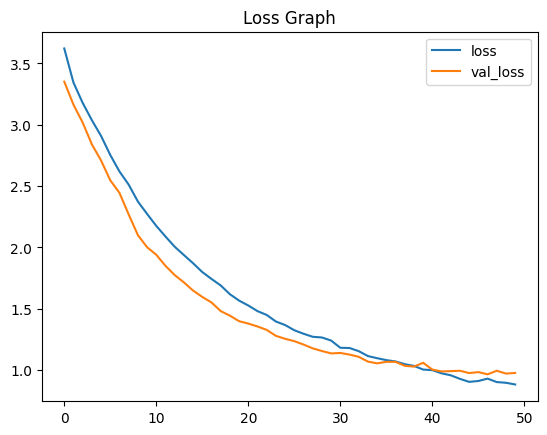

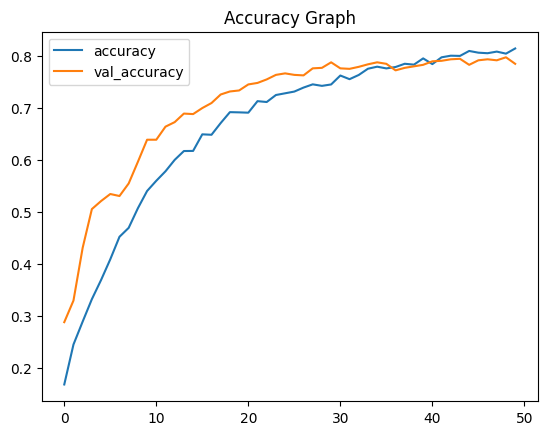

In [58]:
# Entrenar el modelo
history_mlp = model_mlp.fit(X_train_flat, y_train, validation_data=(X_valid_flat, y_valid), epochs=50, batch_size=64)

# Convertir el historial a DataFrame
history_df_mlp = pd.DataFrame(history_mlp.history)

# Graficar la pérdida
history_df_mlp.loc[:, ['loss', 'val_loss']].plot(title="Loss Graph")
plt.show()

# Graficar la precisión
history_df_mlp.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy Graph")
plt.show()

Como se ven incialmente estan alejadas pero tienden a converger ambas gráficas.

In [60]:
# Aplanar las imágenes de prueba
X_test_flat = X_test.reshape((X_test.shape[0], -1)).astype('float32') / 255.0

In [61]:
# Evaluar el modelo de predicción con las imágenes de test
print("[INFO] Evaluando red neuronal...")
predictions = model_mlp.predict(X_test_flat, batch_size=128)
print(classification_report(y_test, predictions.argmax(axis=1)))

[INFO] Evaluando red neuronal...
9/9 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       129
           1       0.85      0.92      0.88       136
           2       0.51      0.77      0.61       142
           3       0.46      0.11      0.17       112
           4       0.85      0.66      0.74       120
           5       0.97      0.99      0.98       140
           6       0.89      0.89      0.89        98
           7       0.93      0.99      0.96       158

    accuracy                           0.80      1035
   macro avg       0.79      0.78      0.76      1035
weighted avg       0.79      0.80      0.78      1035



Las métricas muestran buenos resultados iniciales. La exactitud (accuracy) es del 80%, además llama la atención que de nuevo la clase 3-dog tenga bajos valores de precision y recall seguido por el 4-flower en recall.
Se realizará un último ajuste para ver si mejoran las métricas.

## Modelo MLP Version 2

In [65]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

El modelo cuenta con los siguientes ajustes:
1. Aumento de neuronas en la en todas las capas
2. Ajustar la regularización, se baja el learning_rate de la primera capa y en optimizador
3. Aumento del lote y la tasa de aprendizaje
4. Entrenamiento por más épocas
5. Usar callbacks

In [62]:
# Crear el modelo MLP con más capas y neuronas
model_mlp_2 = Sequential([
    Dense(1024, activation='relu', input_shape=(X_train_flat.shape[1],), kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.4),
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.4),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.4),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.4),
    Dense(8, activation='softmax')  # Cambia a 8 clases según tu dataset
])

Epoch 1/100
76/76 [==============================] - 7s 76ms/step - loss: 5.1844 - accuracy: 0.1419 - val_loss: 4.9961 - val_accuracy: 0.2406 - lr: 5.0000e-05
Epoch 2/100
76/76 [==============================] - 5s 72ms/step - loss: 4.9612 - accuracy: 0.1953 - val_loss: 4.8189 - val_accuracy: 0.3140 - lr: 5.0000e-05
Epoch 3/100
76/76 [==============================] - 5s 71ms/step - loss: 4.7927 - accuracy: 0.2133 - val_loss: 4.6602 - val_accuracy: 0.3787 - lr: 5.0000e-05
Epoch 4/100
76/76 [==============================] - 5s 72ms/step - loss: 4.6380 - accuracy: 0.2539 - val_loss: 4.5190 - val_accuracy: 0.3923 - lr: 5.0000e-05
Epoch 5/100
76/76 [==============================] - 5s 71ms/step - loss: 4.5264 - accuracy: 0.2642 - val_loss: 4.4027 - val_accuracy: 0.4406 - lr: 5.0000e-05
Epoch 6/100
76/76 [==============================] - 6s 75ms/step - loss: 4.3900 - accuracy: 0.3133 - val_loss: 4.2497 - val_accuracy: 0.4812 - lr: 5.0000e-05
Epoch 7/100
76/76 [===========================

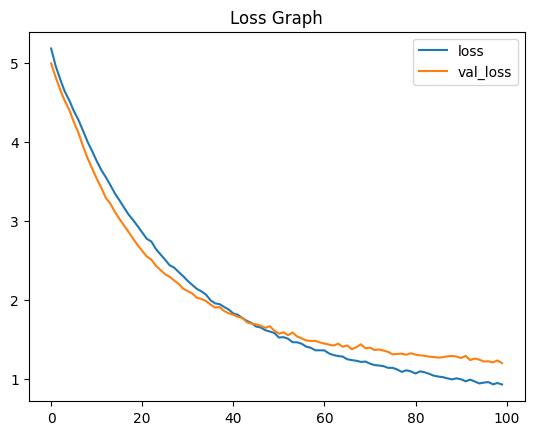

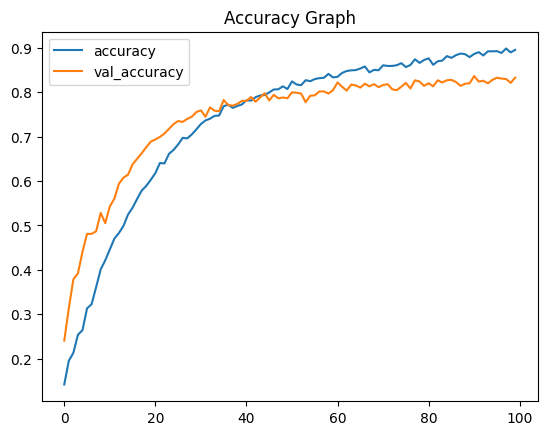

In [66]:
# Compilar el modelo con una tasa de aprendizaje ajustada
model_mlp_2.compile(optimizer=Adam(learning_rate=0.00005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Configurar los callbacks
# patience: Especifica el número de épocas adicionales que se entrenará el modelo después de que la métrica monitoreada haya dejado de mejorar. 
# restore_best_weights: Si se establece en True, restaurará los pesos del modelo al punto en que se obtuvo la mejor métrica monitoreada
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Factor: Especifica el factor de reducción de la tasa de aprendizaje
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Entrenar el modelo
history_mlp = model_mlp_2.fit(X_train_flat, y_train, validation_data=(X_valid_flat, y_valid), epochs=100, batch_size=64,
                            callbacks=[early_stopping, reduce_lr])


history_df_mlp_2 = pd.DataFrame(history_mlp.history)

# Graficar la pérdida
history_df_mlp_2.loc[:, ['loss', 'val_loss']].plot(title="Loss Graph")
plt.show()

# Graficar la precisión
history_df_mlp_2.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy Graph")
plt.show()

Salta a simple vista que el gráfico de pérdida y accuracy se comportan de manera similar al modelo anterior, aunque vemos como a medida que las épocas aumentan pareciera diverger.

In [67]:
# Evaluar el modelo de predicción con las imágenes de test
print("[INFO] Evaluando red neuronal...")
predictions = model_mlp_2.predict(X_test_flat, batch_size=128)
print(classification_report(y_test, predictions.argmax(axis=1)))

[INFO] Evaluando red neuronal...
9/9 [==============================] - 0s 14ms/step
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       129
           1       0.86      0.92      0.89       136
           2       0.63      0.68      0.65       142
           3       0.49      0.40      0.44       112
           4       0.86      0.74      0.79       120
           5       0.97      0.99      0.98       140
           6       0.97      0.88      0.92        98
           7       0.95      0.99      0.97       158

    accuracy                           0.83      1035
   macro avg       0.82      0.82      0.82      1035
weighted avg       0.82      0.83      0.83      1035



La exactitud comparado al modelo anterior mejora en un 83%. Las métricas de precision suelen ser levemente superiores para cada clase y el recall tambien, especificamente se nota más la mejora en la clase 3-dog que tuvo valores muy bajos en estas métricas en el modelo anterior.

## Predicciones MLP Final

In [69]:
# Seleccionar un subconjunto de datos de prueba
X_test_subset = X_test[:1000]
y_test_subset = y_test[:1000]

# Aplanar el subconjunto de datos de prueba
X_test_subset_flat = X_test_subset.reshape((X_test_subset.shape[0], -1)).astype('float32') / 255.0

# Obtener las predicciones del modelo
probas = model_mlp_2.predict(X_test_subset_flat)
test_pred = np.argmax(probas, axis=1)

# Filtrar las imágenes mal clasificadas
misclassified_indices = np.where(y_test_subset != test_pred)[0]
misclassified_images = X_test_subset[misclassified_indices][:25]
misclassified_labels = test_pred[misclassified_indices][:25]
correct_labels = y_test_subset[misclassified_indices][:25]

32/32 [==============================] - 0s 9ms/step


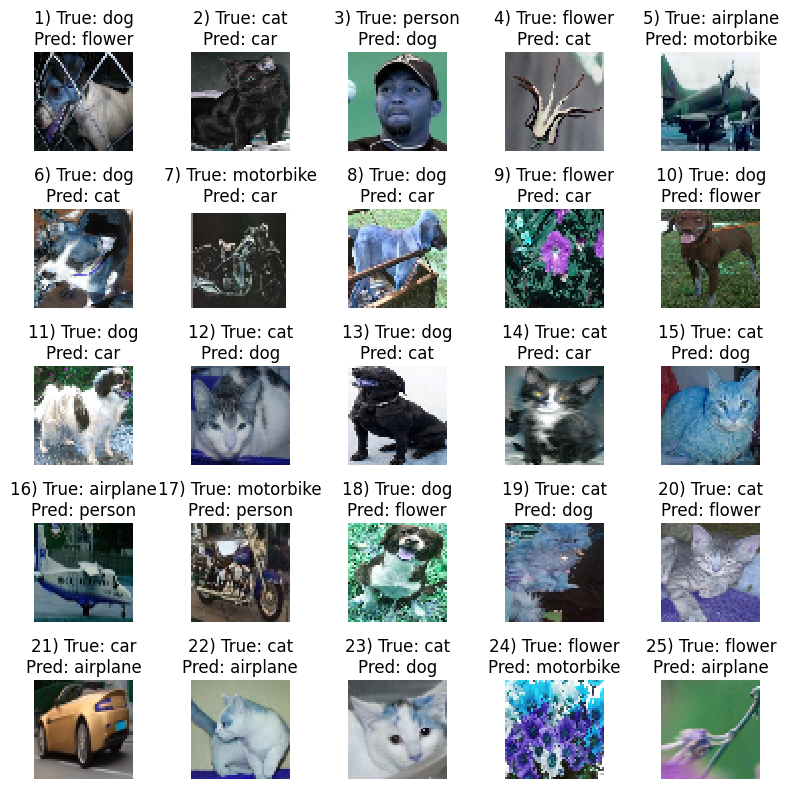

In [70]:
# Visualizar las imágenes mal clasificadas
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True, figsize=(8, 8))
ax = ax.flatten()
for i in range(25):
    img = misclassified_images[i]
    if img.shape[-1] == 3:  # Si las imágenes son RGB
        ax[i].imshow(img, interpolation='nearest')
    else:  # Si las imágenes son en escala de grises
        ax[i].imshow(img.squeeze(), cmap='Greys', interpolation='nearest')
    
    true_class_name = get_class_name(correct_labels[i])
    pred_class_name = get_class_name(misclassified_labels[i])
    
    ax[i].set_title(f'{i+1}) True: {true_class_name}\nPred: {pred_class_name}')
    ax[i].axis('off')

plt.tight_layout()
plt.show()

A lo largo de los experimentos, se realizaron varias versiones y ajustes con el fin de encontrar el modelo que mejor clasifique las imágenes del dataset, por el momento se encontraron como mejores modelos predictivos el Modelo_MLP_V2 y Modelo_1_V3, ya que ambos muestran buena convergencia en sobre la exactitud y pérdida, además de ser diferentes solo por un pequeño porcentaje de exactitud final.
Espero haber utilizado la mayoria de herramientas y estrategias planteadas en la materia para solucionar las dificultades de la construcción y performance de los modelos.